In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from sklearn.metrics import silhouette_score
import time


In [159]:
# Loading training and test set
train = pd.read_csv('/fashion-mnist_train.csv')
test = pd.read_csv('/fashion-mnist_test.csv')

In [160]:
train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [161]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [140]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None


In [141]:
train.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [142]:
test.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [143]:
train.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169     14.093378     23.819481   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    230.000000    224.000000    255.000000    254.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...     34.625400     23.300683     16.588267     17.869433   
std    ...     57.545242     48.854427     41.979611     43.966032   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     58.000000      9.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      22.814817     17.911483      8.520633      2.753300      0.855517   
std       51.830477     45.149388     29.614859     17.397652      9.356960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel784  
count  60000.00000  
mean       0.07025  
std        2.12587  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      170.00000  

[8 rows x 785 columns]

In [144]:
print(train.label.value_counts().sort_index(ascending=True))

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64


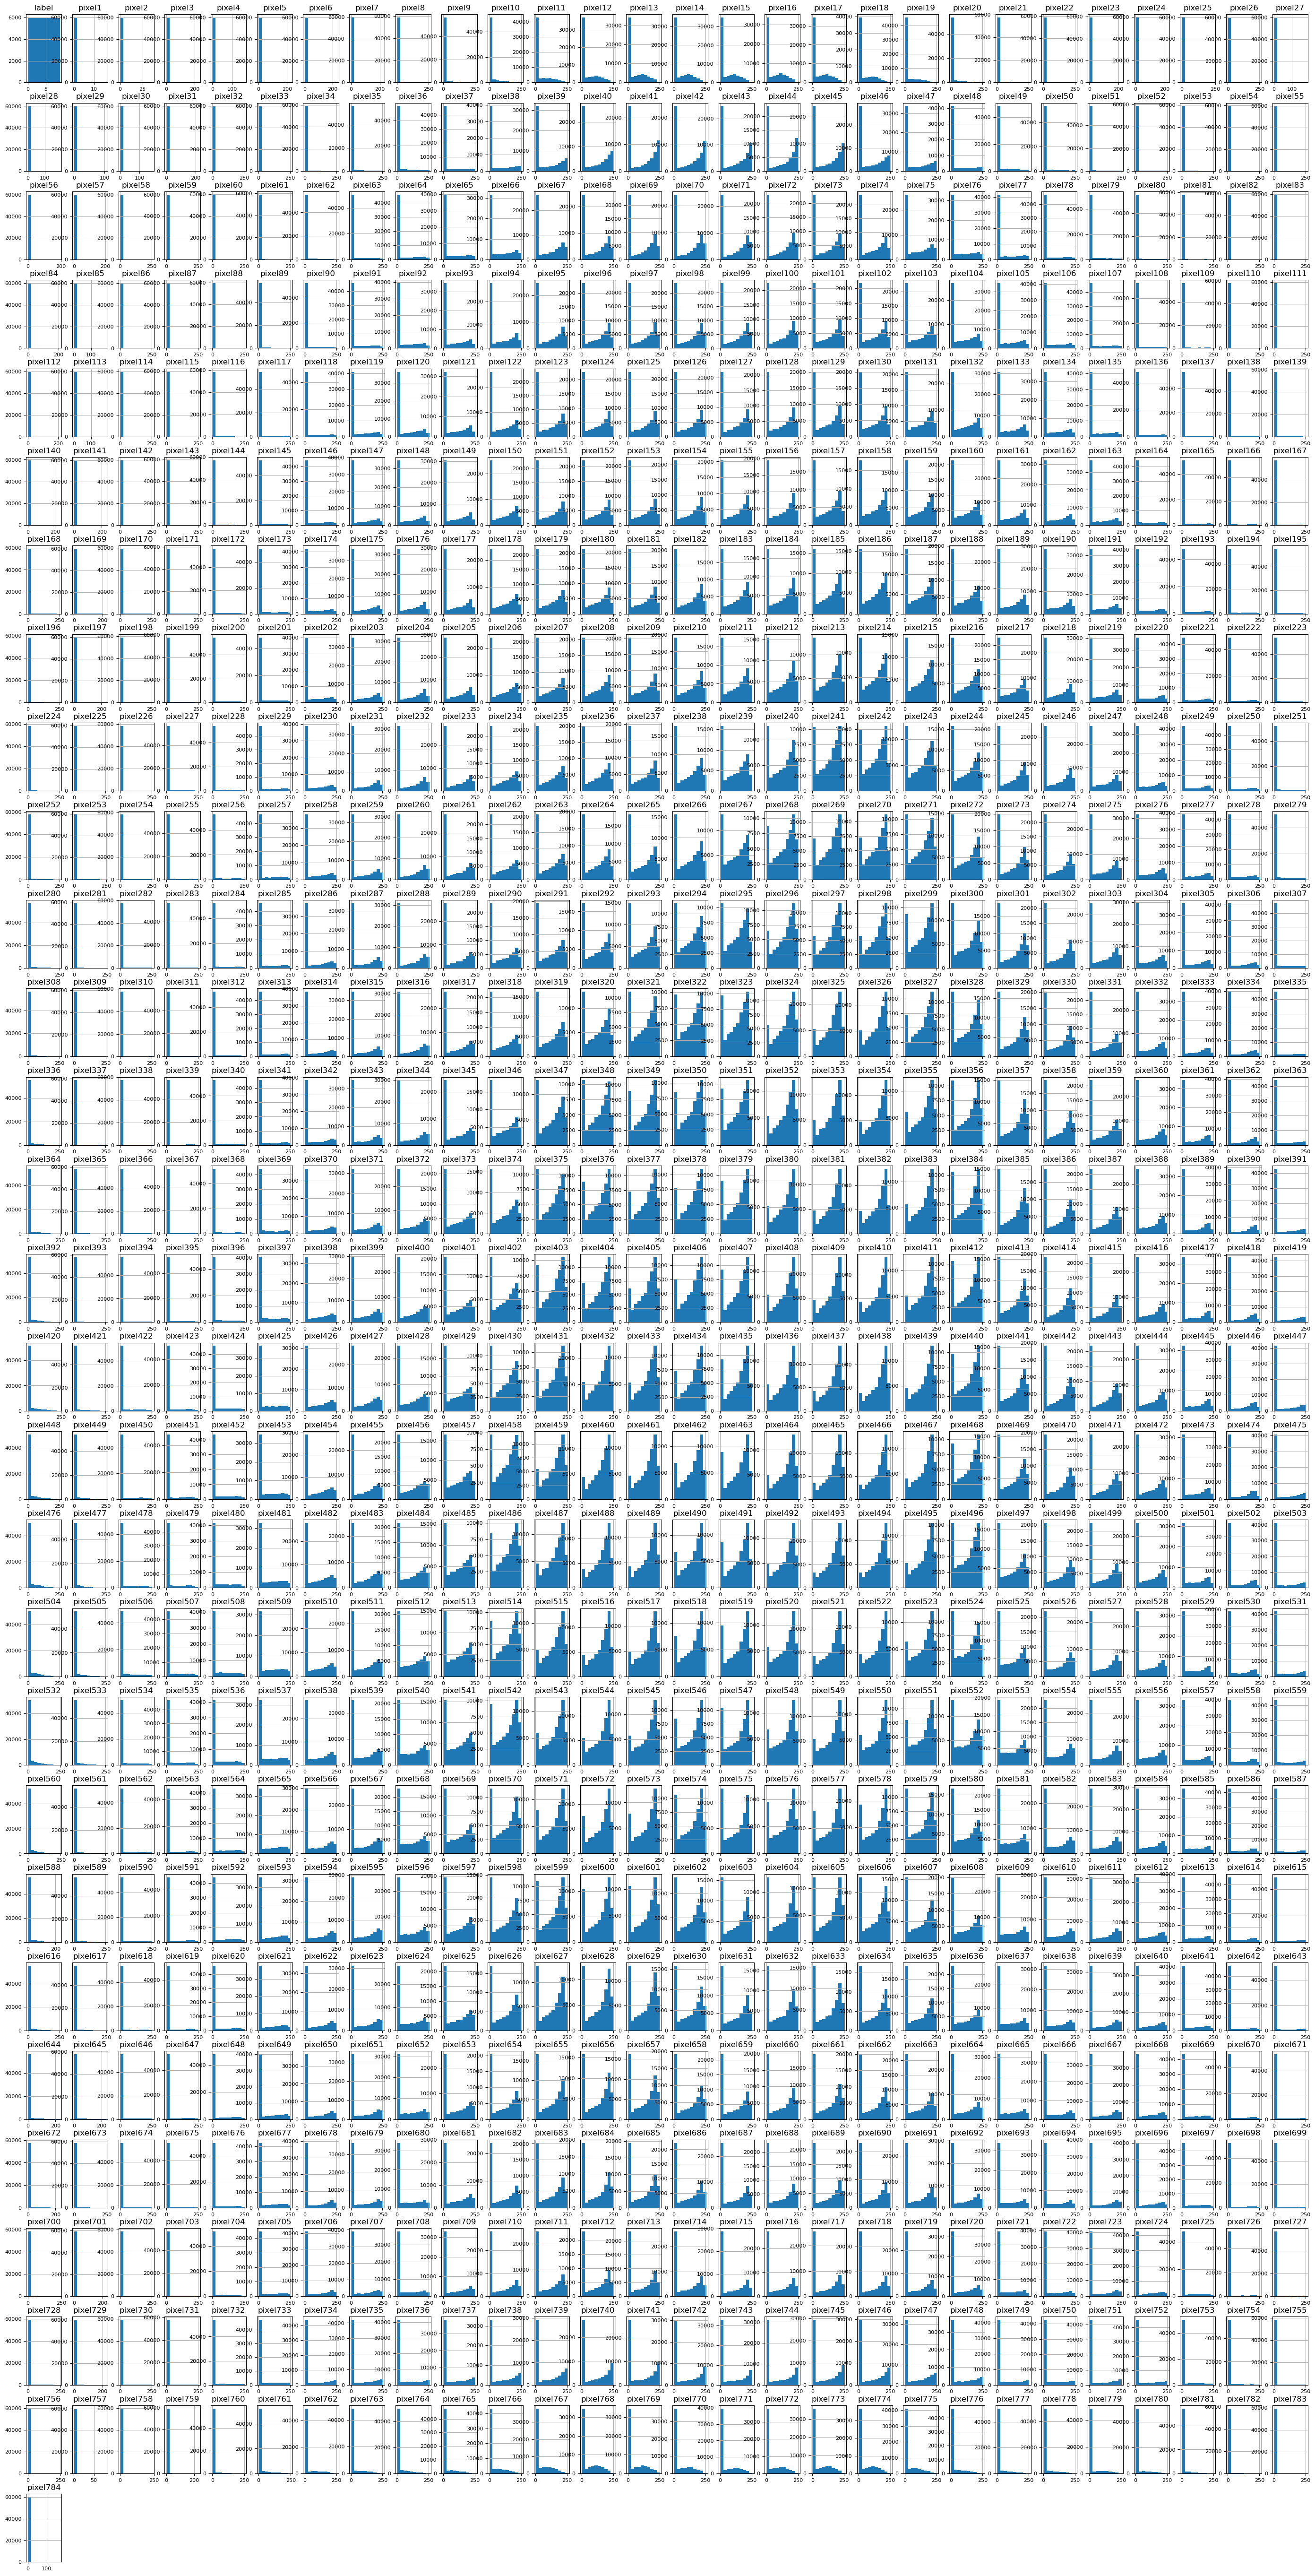

In [54]:
train.hist(figsize=(35, 70), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()



The above plot demonstrates the distribution of pixel values in the Fashion-MNIST dataset. 

In [162]:
x_train = np.array(train.iloc[:, 1:])
y_train = np.array(train.iloc[:, 0])

x_test = np.array(test.iloc[:, 1:])
y_test = np.array(test.iloc[:, 0])

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 784) y_train shape: (60000,)


In [163]:
# Define the text labels
classes = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

In [164]:
# visualize with 2x5 grid
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 100

digits = np.unique(y_train)
digits = [int(a) for a in digits]
digits.sort()
digits

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

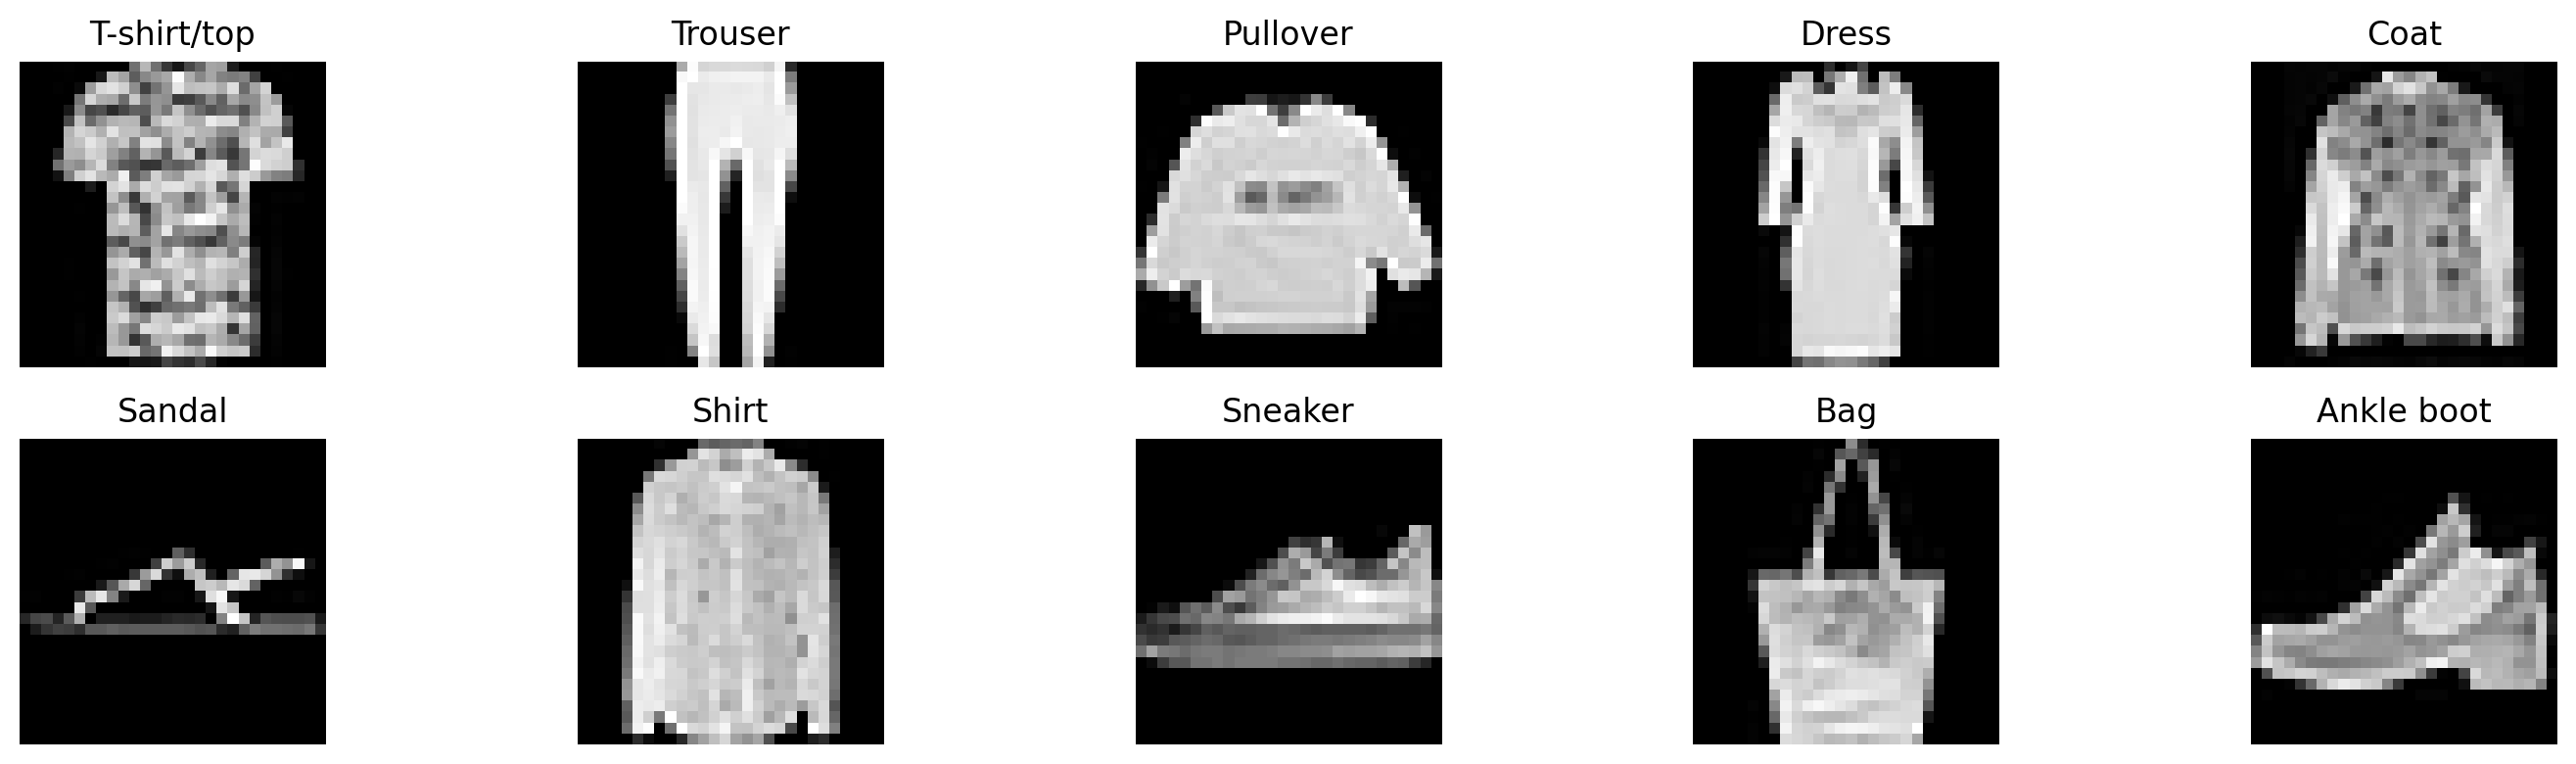

In [165]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
    plt.subplot(2, 5, i + 1)
    indices = np.where(y_train == i)[0]
    image = x_train[indices[0]].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(classes[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


# T-SNE (t-Distributed Stochastic Neighbor Embedding)

It is a dimensionality reduction technique used to visualize high-dimensional data in a lower-dimensional space (typically 2D or 3D). Unlike linear techniques like PCA, t-SNE focuses on preserving the local structure of the data points, making it effective for visualizing clusters and revealing patterns that may not be apparent in the original high-dimensional space.
t-SNE works by measuring pairwise similarities between data points in the high-dimensional space and then optimizing a lower-dimensional representation in a way that maintains these similarities as closely as possible. It does this by minimizing the divergence between probability distributions representing pairwise similarities in the high-dimensional and low-dimensional spaces. In brief, t-SNE can preserve the spatial relationship between data points after reducing the dimensionality of the data. It means that the nearby data (points with similar characteristics) in the original dimension will still be nearby in the lower dimension!

### Without feature scaling

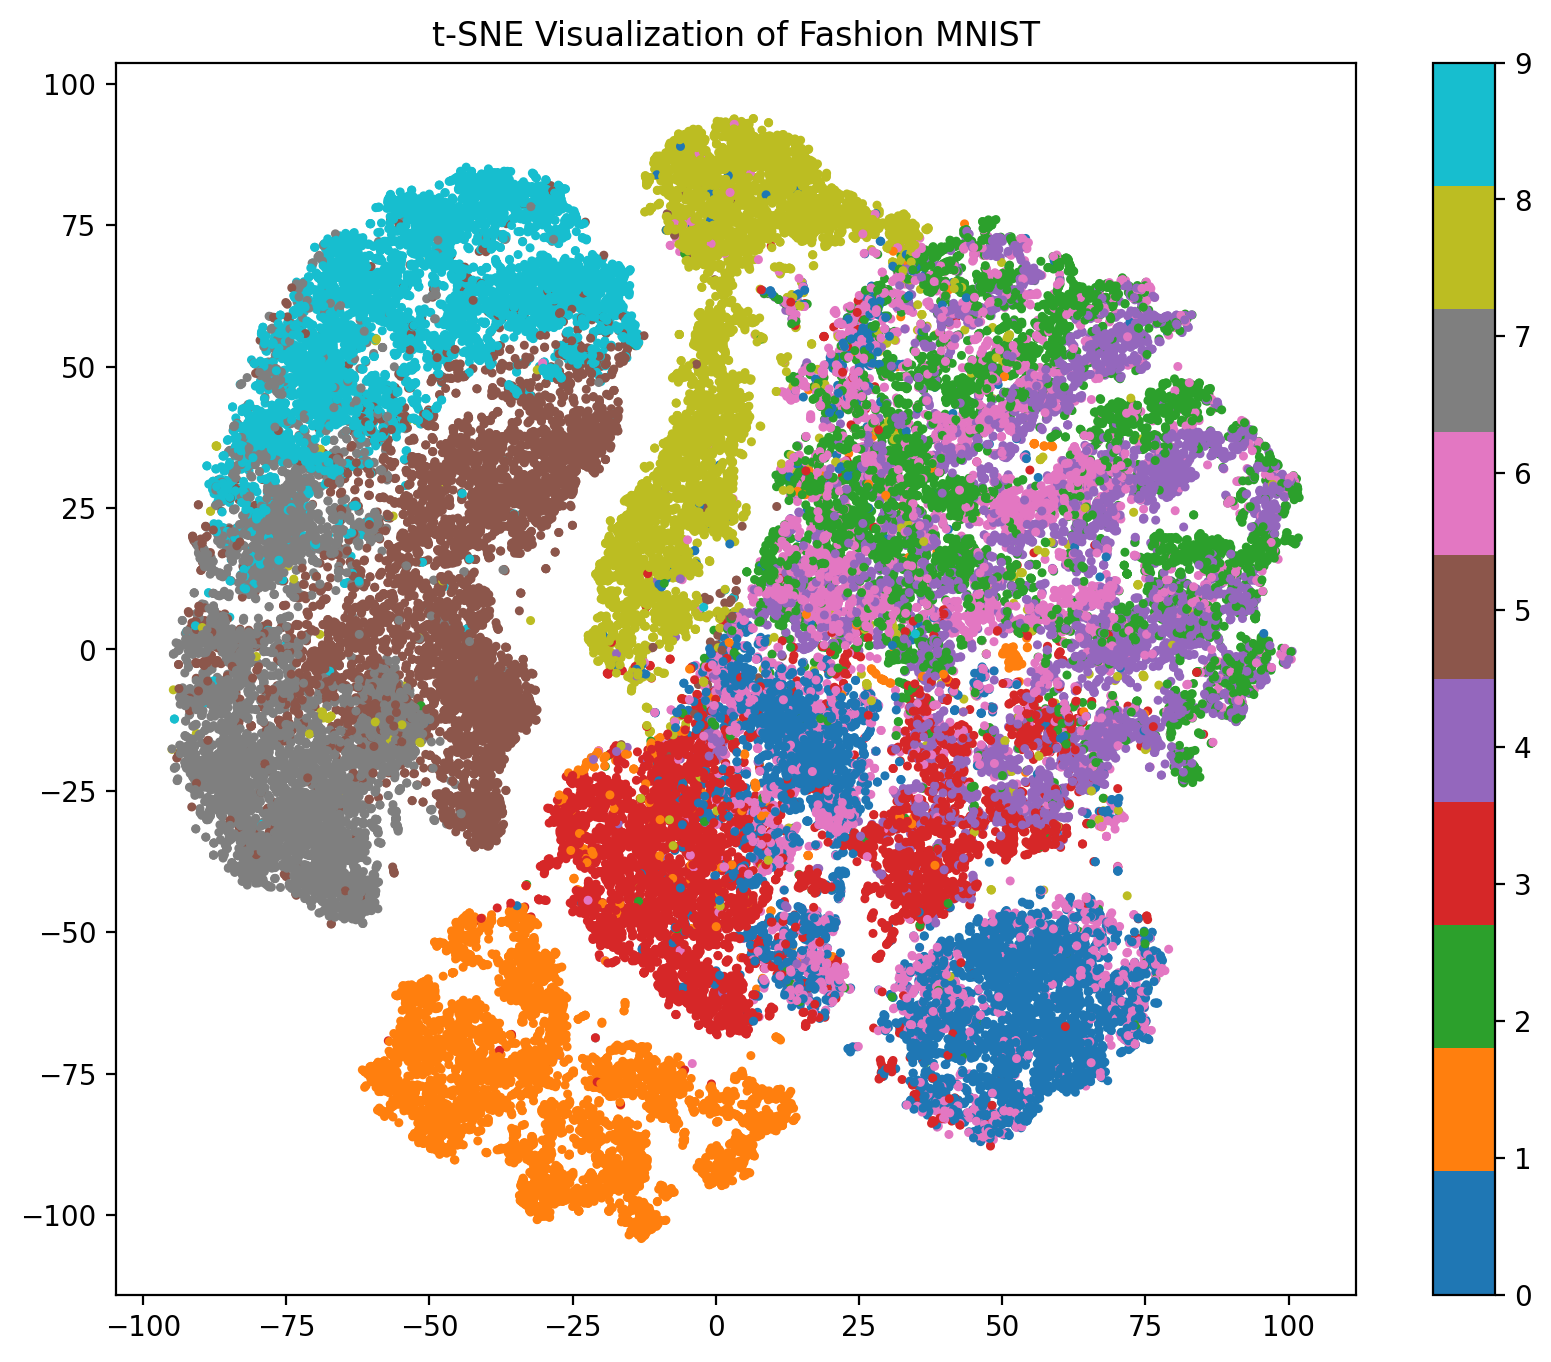

It took 426.9496822357178 seconds to execute


In [146]:
start_time = time.time()

# Separate features and labels
X = x_train
y = y_train

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for t-SNE results and add class labels
tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Label'] = y

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Label'], cmap='tab10', s=5)
plt.colorbar()
plt.title('t-SNE Visualization of Fashion MNIST')
plt.show()
print("It took %s seconds to execute" % (time.time() - start_time))


The following cell takes too long (1.8 hrs almost)

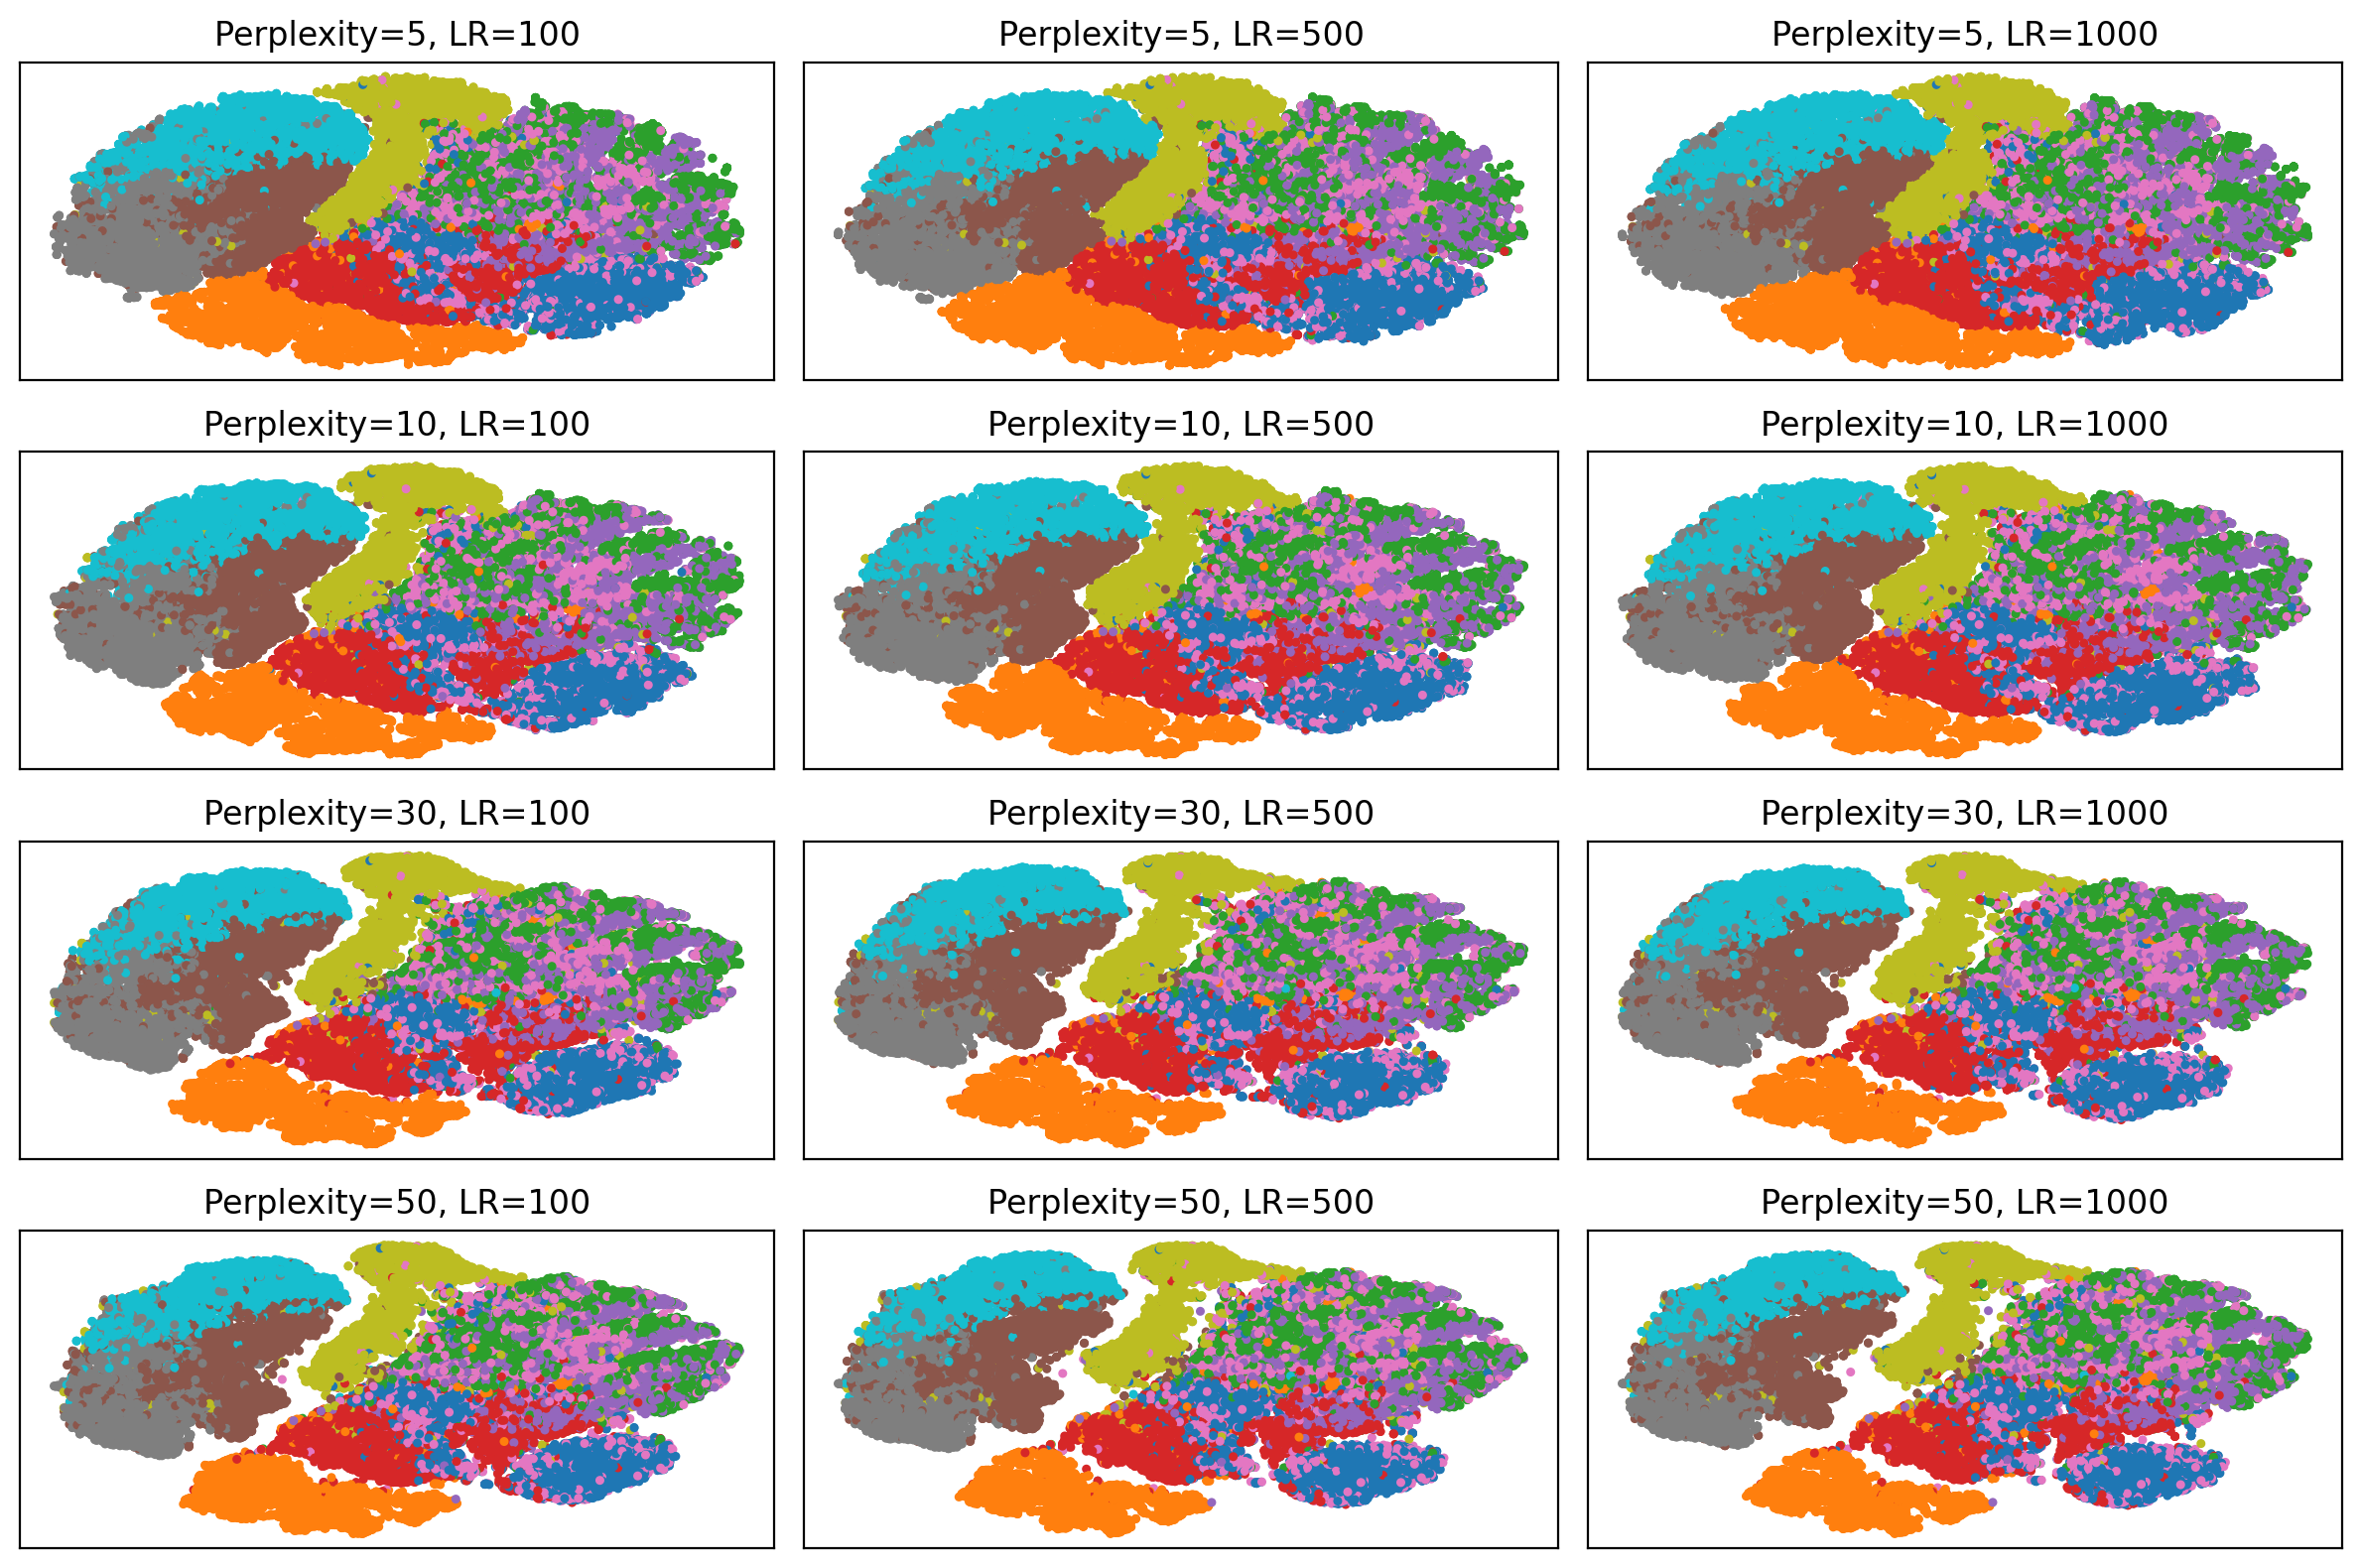

In [85]:

from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for t-SNE (perplexity and learning rate)
perplexity_values = [5, 10, 30, 50]
learning_rate_values = [100, 500, 1000]

plt.figure(figsize=(12, 8))
for i, perplexity in enumerate(perplexity_values):
    for j, learning_rate in enumerate(learning_rate_values):
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
        X_tsne = tsne.fit_transform(X)

        plt.subplot(len(perplexity_values), len(learning_rate_values), i * len(learning_rate_values) + j + 1)
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=5)
        plt.title(f'Perplexity={perplexity}, LR={learning_rate}')
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()


### Feature Scaling

In [147]:
#applying the tsne, kmeans, pca, svd, tsvd, fast ica after scaling the data
X_train=x_train/255
Y_train=y_train
X_test=x_test/255
Y_test=y_test

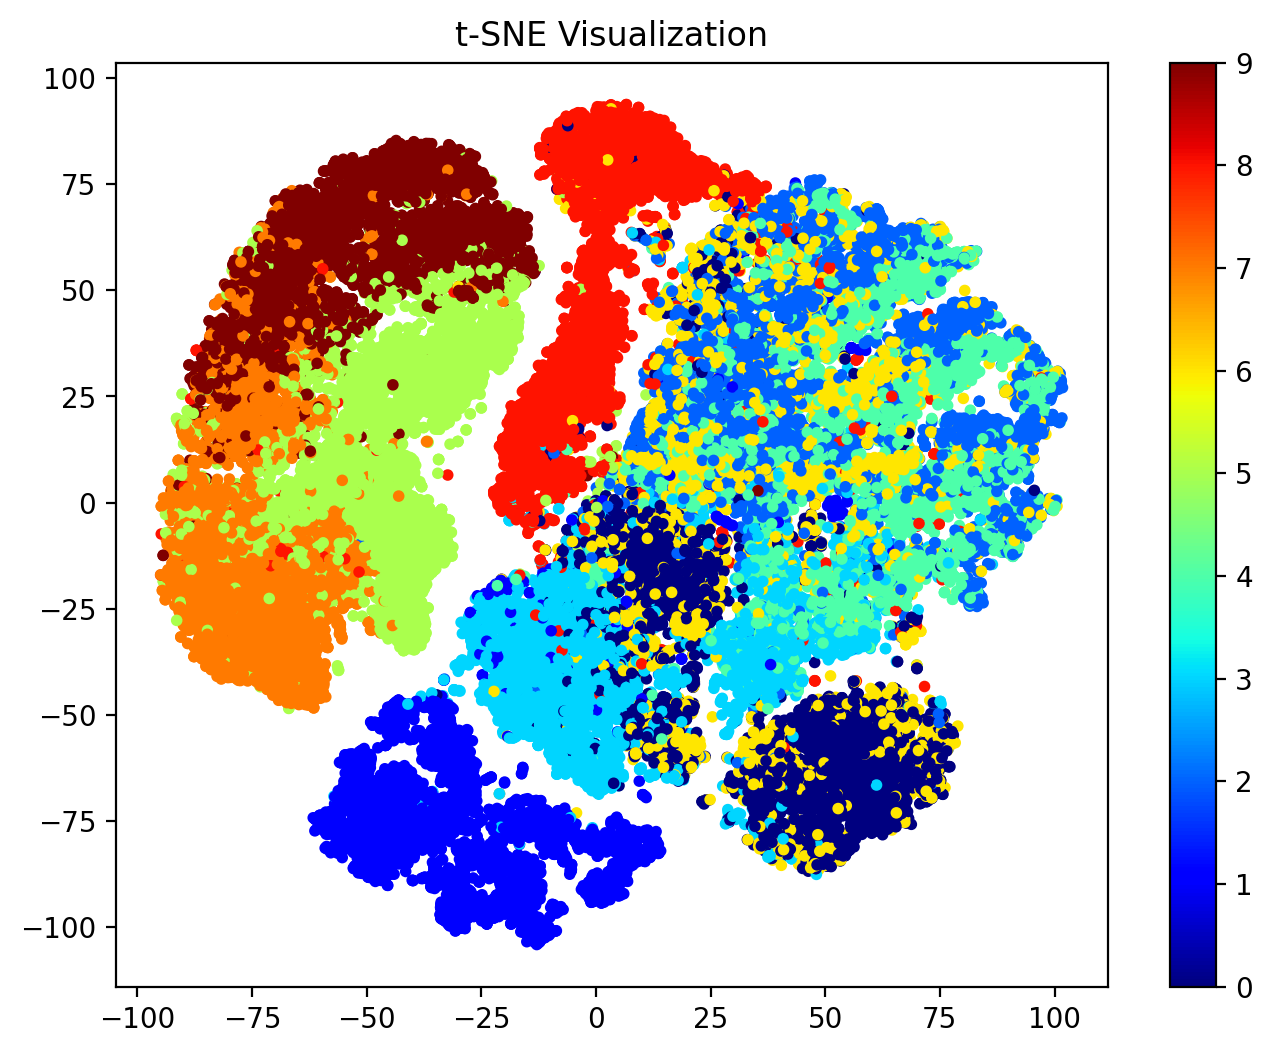

In [148]:
#Applying t-SNE 
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(X_train)

# Plot t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=Y_train, cmap='jet', s=10)
plt.colorbar()
plt.title('t-SNE Visualization')
plt.show()

Silhouette Score for K-means with t-SNE: 0.38674918


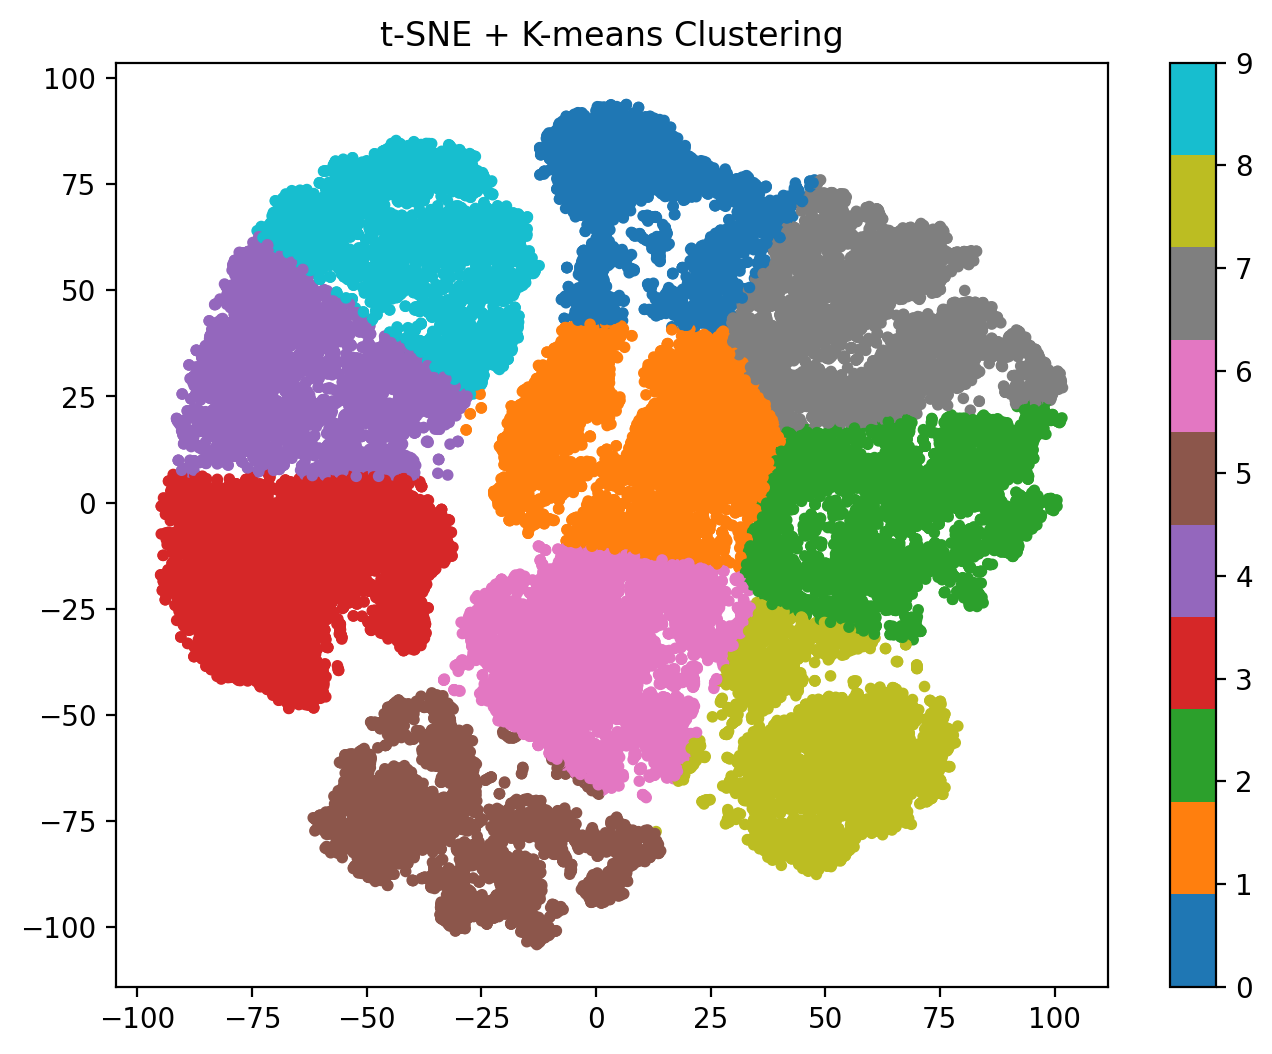

In [149]:
# Apply K-means with hyperparameter tuning for t-SNE
param_grid_kmeans_tsne = {
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300]
}

kmeans_tsne = KMeans(random_state=42,n_clusters=10) #as we know already no. of classes=10 (ground truth)
grid_search_kmeans_tsne = GridSearchCV(kmeans_tsne, param_grid_kmeans_tsne, cv=3)
grid_search_kmeans_tsne.fit(x_tsne)

# Best hyperparameters for K-means with t-SNE
best_kmeans_tsne = grid_search_kmeans_tsne.best_estimator_

# Applying K-means with the best hyperparameters for t-SNE
labels_kmeans_tsne = best_kmeans_tsne.predict(x_tsne)

# Calculate the silhouette score for t-SNE
silhouette_avg_tsne = silhouette_score(x_tsne, labels_kmeans_tsne)
print("Silhouette Score for K-means with t-SNE:", silhouette_avg_tsne)

# Plot t-SNE result with K-means clustering
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=labels_kmeans_tsne, cmap='tab10', s=10)
plt.colorbar()
plt.title('t-SNE + K-means Clustering')
plt.show()


# PCA + Kmeans

Silhouette Score for K-means with PCA: 0.3975064609072818


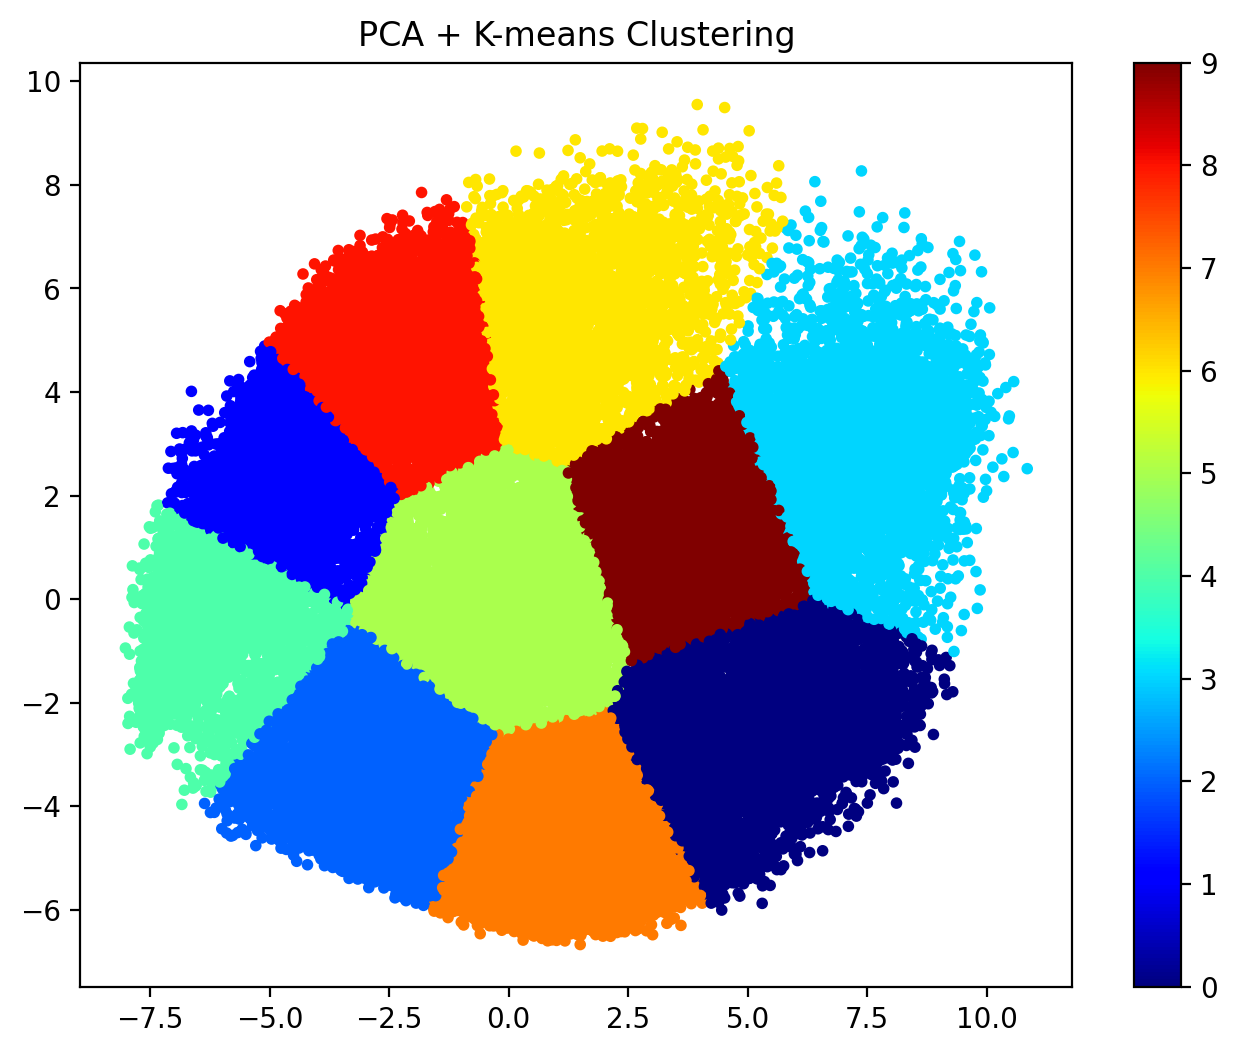

In [150]:
# Apply PCA and then K-means with hyperparameter tuning
param_grid_kmeans = {
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300]
}

pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(X_train)

kmeans_pca = KMeans(random_state=42, n_clusters=10)
grid_search_kmeans_pca = GridSearchCV(kmeans_pca, param_grid_kmeans, cv=3)
grid_search_kmeans_pca.fit(x_pca)

best_kmeans_pca = grid_search_kmeans_pca.best_estimator_
labels_kmeans_pca = best_kmeans_pca.predict(x_pca)

# Compute Silhouette Score for K-means with PCA
silhouette_avg_pca = silhouette_score(x_pca, labels_kmeans_pca)
print("Silhouette Score for K-means with PCA:", silhouette_avg_pca)

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_kmeans_pca, cmap='jet', s=10)
plt.colorbar()
plt.title('PCA + K-means Clustering')
plt.show()

# SVD+Kmeans

SVD is a matrix factorization technique that decomposes a matrix X into three matrices: U, s, and V, such that X = U * diag(s) * V^T, where:

* U (shape: (n_samples, n_samples)) is a unitary matrix that represents the left singular vectors of X.
* s (shape: (n_features,)) contains the singular values of X, which are the square roots of the eigenvalues of X^T * X or X * X^T. The singular values are sorted in descending order.
* V (shape: (n_features, n_features)) is a unitary matrix that represents the right singular vectors of X

Best hyperparameters for K-means with SVD: {'max_iter': 100, 'n_init': 5}


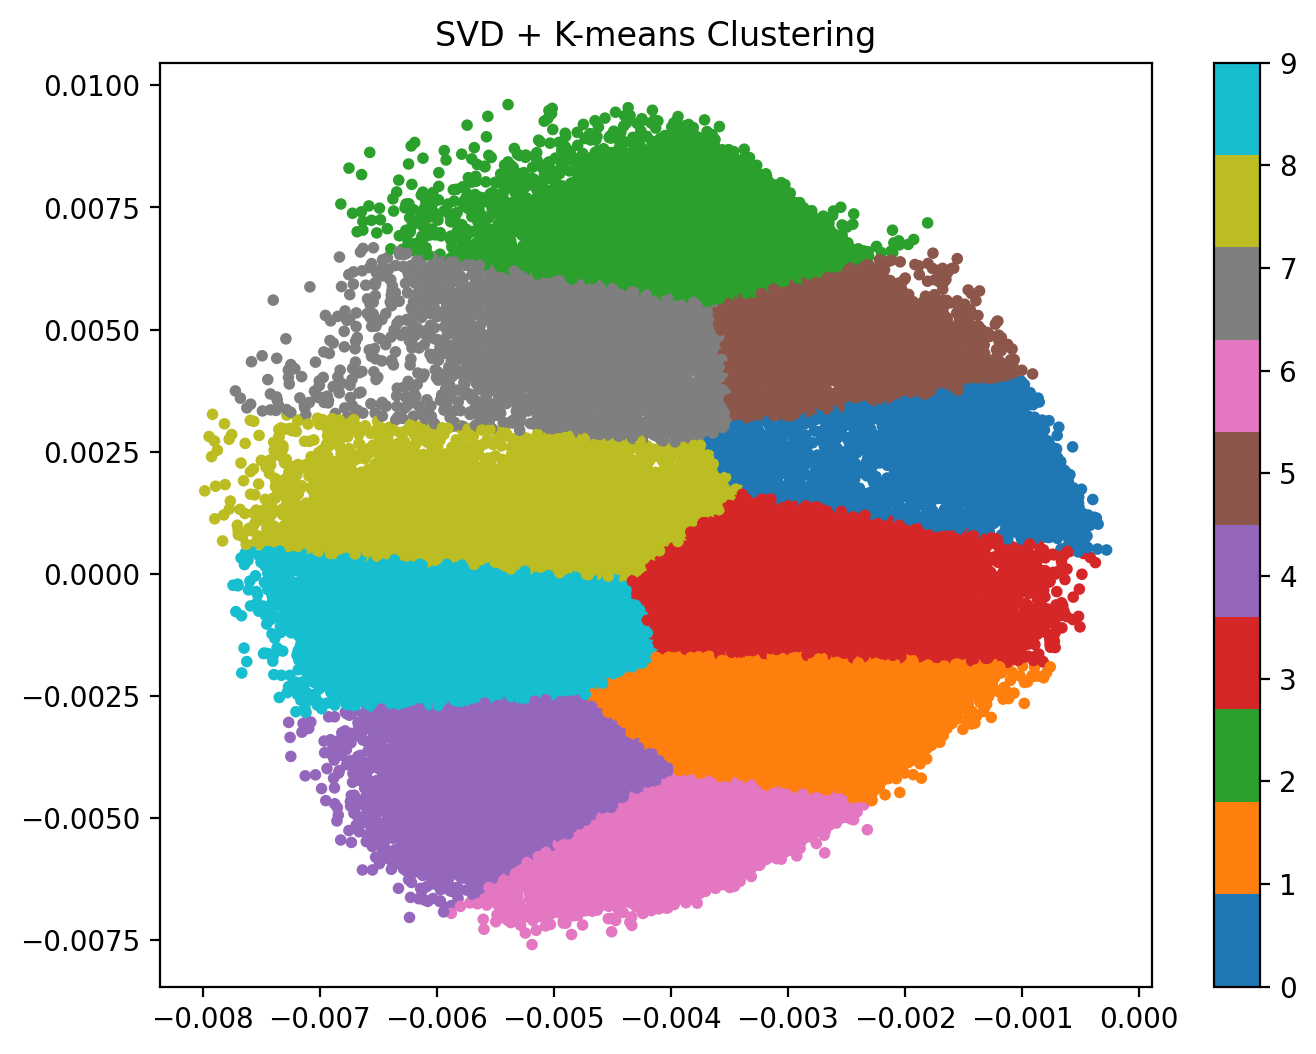

Silhouette Score for SVD + K-means: 0.38711870909970275


In [151]:

# Applying SVD and then K-means
U, s, V = svd(X_train, full_matrices=False)
x_svd = U[:, :2]  # Project to 2 dimensions using the first two components


# K-means hyperparameter tuning for SVD
param_grid_kmeans_svd = {
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300]
}

kmeans_svd = KMeans(random_state=42, n_clusters=10)
grid_search_kmeans_svd = GridSearchCV(kmeans_svd, param_grid_kmeans_svd, cv=3)
grid_search_kmeans_svd.fit(x_svd)

# Best hyperparameters for K-means with SVD
best_kmeans_svd = grid_search_kmeans_svd.best_estimator_
print("Best hyperparameters for K-means with SVD:", grid_search_kmeans_svd.best_params_)

# Applying K-means with the best SVD
labels_kmeans_svd = best_kmeans_svd.predict(x_svd)

# Plot SVD + K-means result
plt.figure(figsize=(8, 6))
plt.scatter(x_svd[:, 0], x_svd[:, 1], c=labels_kmeans_svd, cmap='tab10', s=10)
plt.colorbar()
plt.title('SVD + K-means Clustering')
plt.show()

# Calculate the silhouette score for SVD + K-means
silhouette_avg_svd = silhouette_score(x_svd, labels_kmeans_svd)
print("Silhouette Score for SVD + K-means:", silhouette_avg_svd)


# Truncated SVD+ Kmeans

Best hyperparameters for K-means with Truncated SVD: {'max_iter': 200, 'n_init': 10}


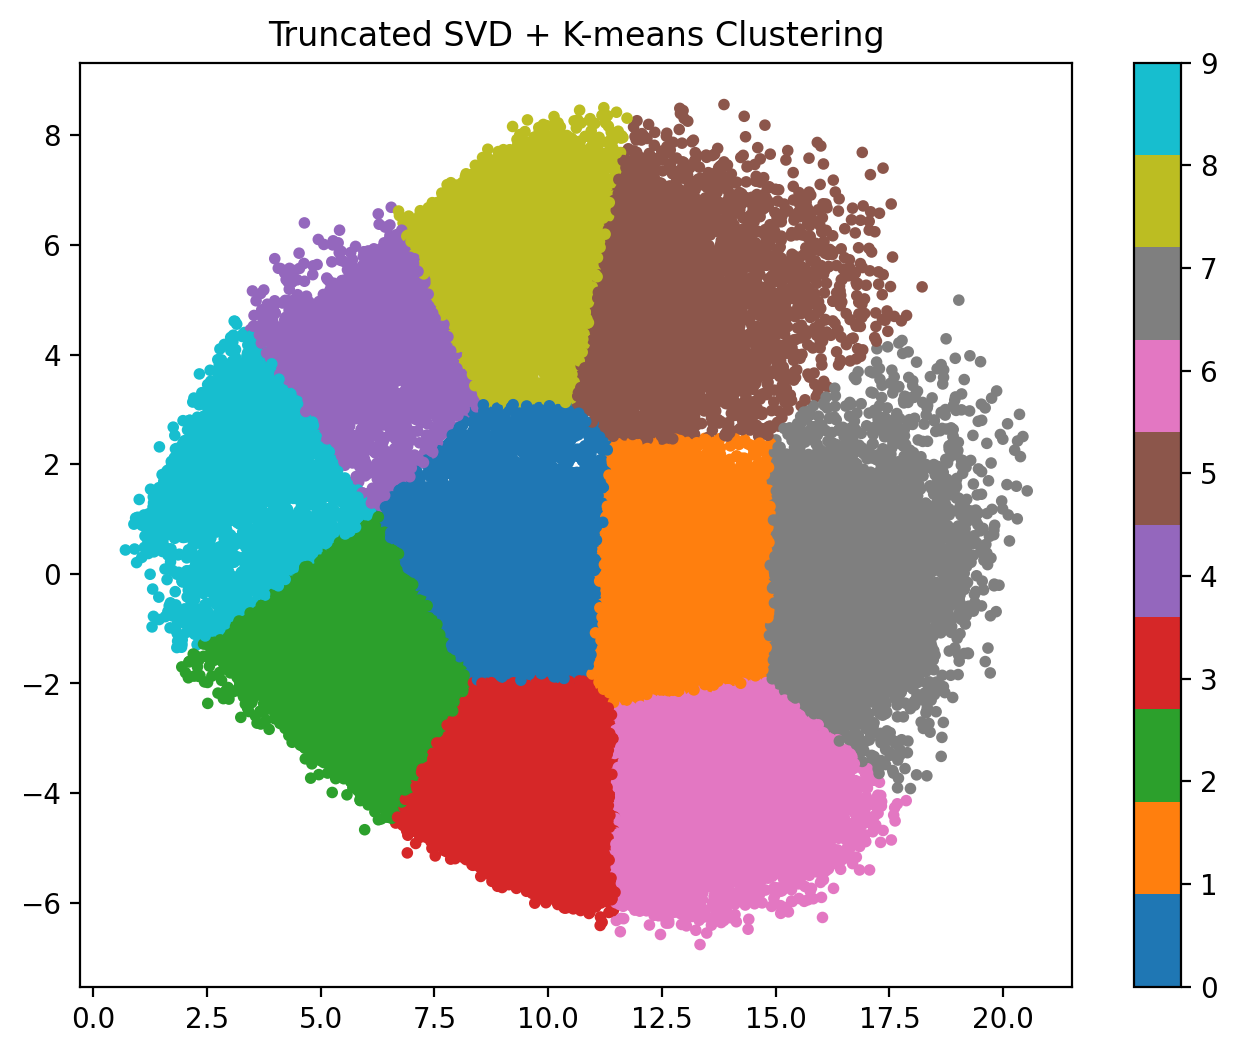

Silhouette Score for Truncated SVD + K-means: 0.4026751228973261


In [152]:
from sklearn.decomposition import TruncatedSVD

# Applying Truncated SVD
tsvd = TruncatedSVD(n_components=2, random_state=42)
x_tsvd = tsvd.fit_transform(X_train)


# Apply K-means with hyperparameter tuning for Truncated SVD
param_grid_kmeans_tsvd = {
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300]
}

kmeans_tsvd = KMeans(random_state=42, n_clusters=10)
grid_search_kmeans_tsvd = GridSearchCV(kmeans_tsvd, param_grid_kmeans_tsvd, cv=3)
grid_search_kmeans_tsvd.fit(x_tsvd)

# Best hyperparameters for K-means with Truncated SVD
best_kmeans_tsvd = grid_search_kmeans_tsvd.best_estimator_
print("Best hyperparameters for K-means with Truncated SVD:", grid_search_kmeans_tsvd.best_params_)

# Applying K-means with the best Truncated SVD
labels_kmeans_tsvd = best_kmeans_tsvd.predict(x_tsvd)

# Plot Truncated SVD + K-means result
plt.figure(figsize=(8, 6))
plt.scatter(x_tsvd[:, 0], x_tsvd[:, 1], c=labels_kmeans_tsvd, cmap='tab10', s=10)
plt.colorbar()
plt.title('Truncated SVD + K-means Clustering')
plt.show()

# Calculate the silhouette score for Truncated SVD + K-means
silhouette_avg_tsvd = silhouette_score(x_tsvd, labels_kmeans_tsvd)
print("Silhouette Score for Truncated SVD + K-means:", silhouette_avg_tsvd)


# FAST ICA + Kmeans

/Users/xehad/anaconda3/envs/pfenv/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Best hyperparameters for K-means with ICA: {'max_iter': 100, 'n_init': 15}


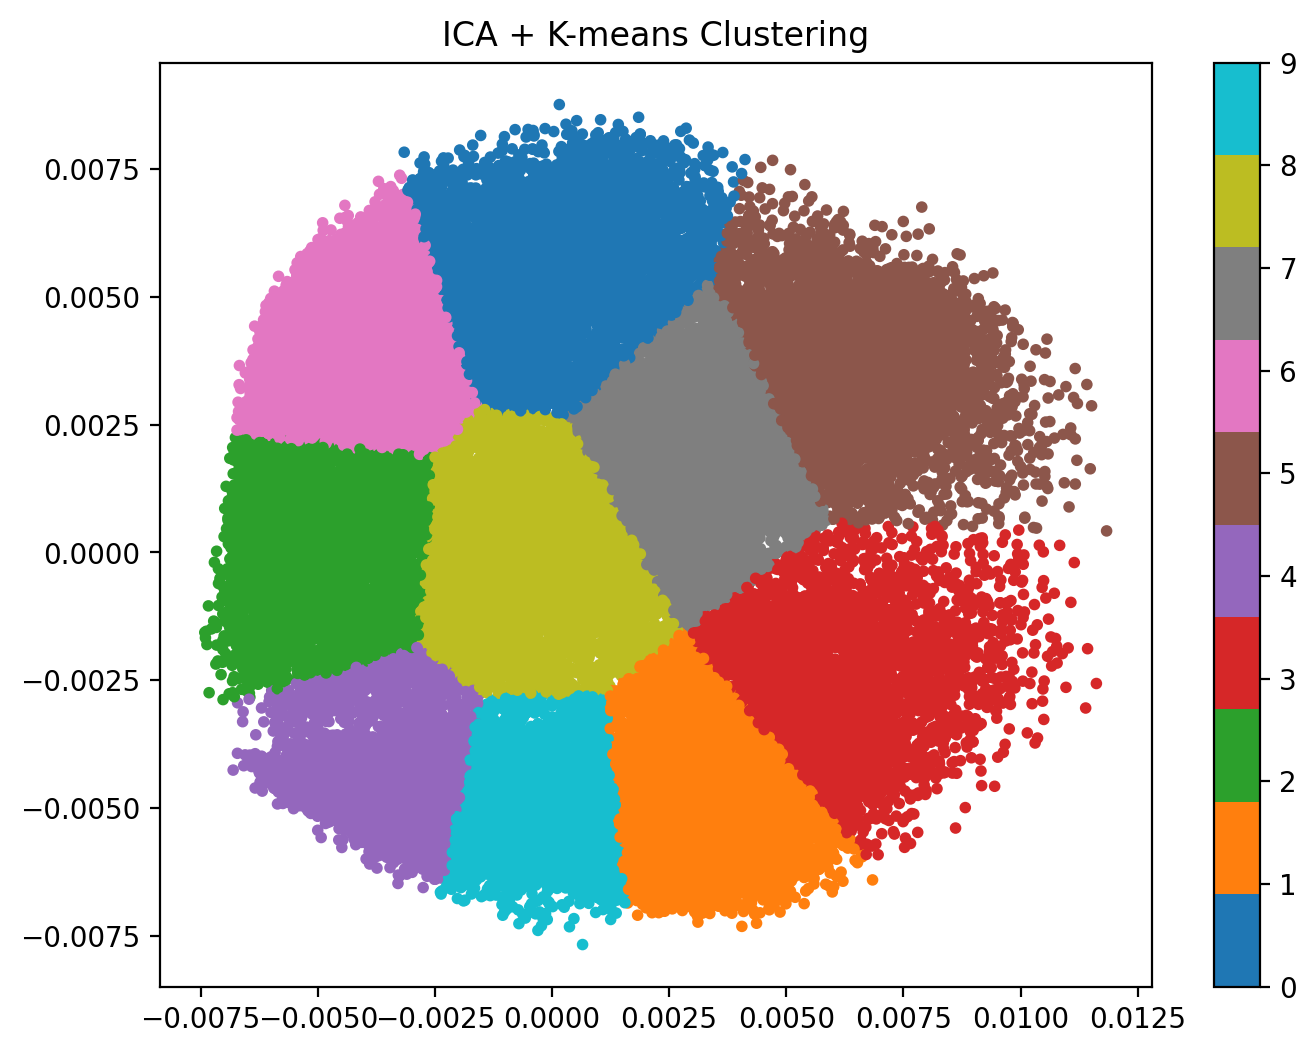

Silhouette Score for ICA + K-means: 0.3924950885111888


In [153]:
# Applying Fast ICA
ica = FastICA(n_components=2, random_state=42)
x_ica = ica.fit_transform(X_train)


# Apply K-means with hyperparameter tuning for ICA
param_grid_kmeans_ica = {
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300]
}

kmeans_ica = KMeans(random_state=42, n_clusters=10)
grid_search_kmeans_ica = GridSearchCV(kmeans_ica, param_grid_kmeans_ica, cv=3)
grid_search_kmeans_ica.fit(x_ica)

# Best hyperparameters for K-means with ICA
best_kmeans_ica = grid_search_kmeans_ica.best_estimator_
print("Best hyperparameters for K-means with ICA:", grid_search_kmeans_ica.best_params_)

# Applying K-means with the best ICA
labels_kmeans_ica = best_kmeans_ica.predict(x_ica)

# Plot ICA + K-means result
plt.figure(figsize=(8, 6))
plt.scatter(x_ica[:, 0], x_ica[:, 1], c=labels_kmeans_ica, cmap='tab10', s=10)
plt.colorbar()
plt.title('ICA + K-means Clustering')
plt.show()

# Calculate the silhouette score for ICA + K-means
silhouette_avg_ica = silhouette_score(x_ica, labels_kmeans_ica)
print("Silhouette Score for ICA + K-means:", silhouette_avg_ica)


# Comparing Results

In [154]:
# List of silhouette scores for each method
silhouette_scores = [silhouette_avg_tsne, silhouette_avg_pca, silhouette_avg_svd, silhouette_avg_tsvd, silhouette_avg_ica]

# List of method names
methods = ['t-SNE', 'PCA', 'SVD', 'Truncated SVD', 'ICA']

# Find the index of the method with the highest silhouette score
best_method_index = np.argmax(silhouette_scores)

# Get the name of the best method
best_method = methods[best_method_index]

print(best_method)

Truncated SVD


Silhouette Score on Test Data: 0.07754281788130456


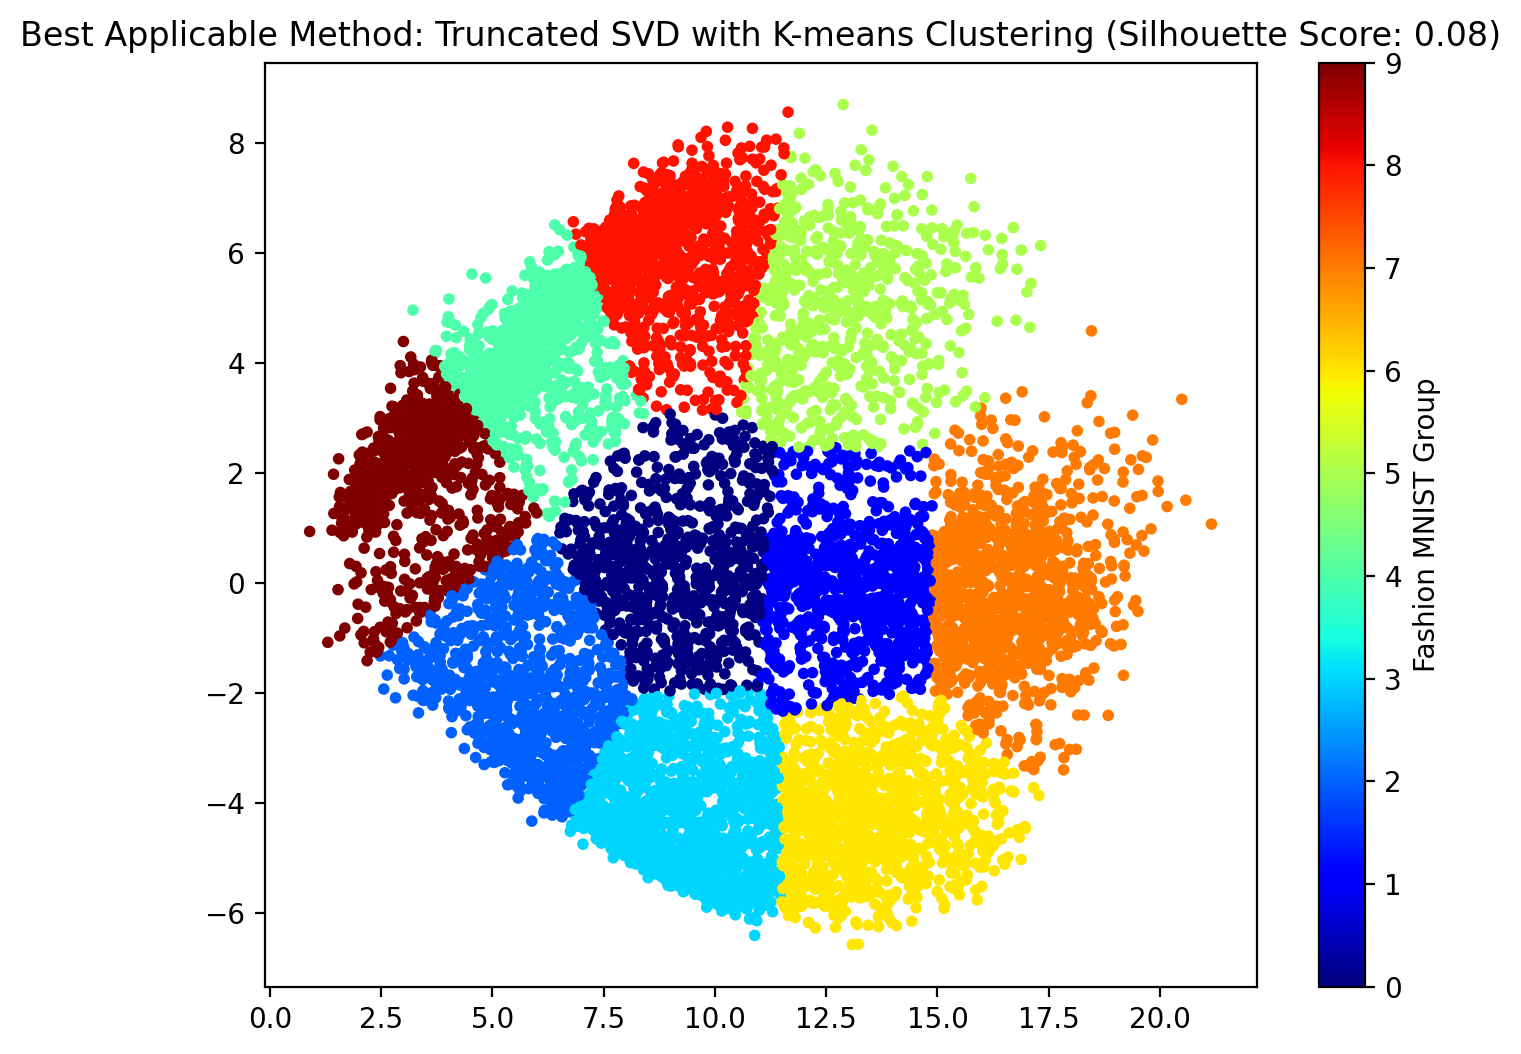

In [156]:
# List of silhouette scores for each method
silhouette_scores = [silhouette_avg_tsne, silhouette_avg_pca, silhouette_avg_svd, silhouette_avg_tsvd, silhouette_avg_ica]

# List of method names
methods = ['t-SNE', 'PCA', 'SVD', 'Truncated SVD', 'ICA']

# Find the index of the method with the highest silhouette score
best_method_index = np.argmax(silhouette_scores)

# Get the name of the best method
best_method = methods[best_method_index]

# Apply the best method to our data and fit the K-means model with the best method on the full training data
if best_method == 't-SNE':
    clustering_method = KMeans(**grid_search_kmeans_tsne.best_params_, random_state=42, n_clusters=10)
    x_transformed = x_tsne
elif best_method == 'PCA':
    clustering_method = KMeans(**grid_search_kmeans_pca.best_params_, random_state=42, n_clusters=10)
    x_transformed = x_pca
elif best_method == 'SVD':
    clustering_method = KMeans(**grid_search_kmeans_svd.best_params_, random_state=42, n_clusters=10)
    x_transformed = x_svd
elif best_method == 'Truncated SVD':
    clustering_method = KMeans(**grid_search_kmeans_tsvd.best_params_, random_state=42, n_clusters=10)
    x_transformed = x_tsvd
else:  # ICA
    clustering_method = KMeans(**grid_search_kmeans_ica.best_params_, random_state=42, n_clusters=10)
    x_transformed = x_ica

# Fit the K-means model on the full training data
best_clustering_method = clustering_method.fit(x_transformed)

# Transform the test data using the chosen dimensionality reduction technique
if best_method == 't-SNE':
    x_test_transformed = tsne.transform(X_test)
elif best_method == 'PCA':
    x_test_transformed = pca.transform(X_test)
elif best_method == 'SVD':
    U_test, _, _ = svd(X_test, full_matrices=False)
    x_test_transformed = U_test[:, :2]
elif best_method == 'Truncated SVD':
    x_test_transformed = truncated_svd.transform(X_test)
else:  # ICA
    x_test_transformed = ica.transform(X_test)

# Predict clusters on the test data using the trained clustering model
labels_test = best_clustering_method.predict(x_test_transformed)

# Evaluate the clustering performance using silhouette score on the test data
silhouette_avg_test = silhouette_score(X_test, labels_test)
print("Silhouette Score on Test Data:", silhouette_avg_test)

# Plot the best applicable method's result with K-means clustering on the test data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_test_transformed[:, 0], x_test_transformed[:, 1], c=labels_test, cmap='jet', s=10)
plt.colorbar(scatter, ticks=range(10), label='Fashion MNIST Group')
plt.title(f'Best Applicable Method: {best_method} with K-means Clustering (Silhouette Score: {silhouette_avg_test:.2f})')
plt.show()


A silhouette score of 0.08 indicates that the clustering results are not well-separated and there is a considerable overlap between clusters. A silhouette score ranges from -1 to 1, where values close to 1 indicate well-separated clusters, values close to 0 indicate overlapping clusters, and negative values indicate incorrect cluster assignments.

# Unsupervised Learning on Fashion MNIST Dataset - Summary

This repository contains code for performing unsupervised learning on the Fashion MNIST dataset using various dimensionality reduction techniques and clustering algorithms. The goals are to apply different techniques, determine the best applicable method for clustering the Fashion MNIST images and visualize the resulting clusters.

## Dataset

The Fashion MNIST dataset consists of training set of 60,000 examples and a test set of 10,000 examples. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total and associated with a label from 10 classes indicating as follows:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

## Workflow

1. **Data Preprocessing and EDA**: The dataset is loaded and being analyzed. The pixel values in an image typically range from 0 to 255 for grayscale images. By dividing all pixel values by 255, the values have been scaled down to be in the range of 0 to 1. This scaling ensures that all pixel values are on a similar scale.

2. **t-SNE Dimensionality Reduction**: t-SNE is used to reduce the high-dimensional feature space of the images into a 2-dimensional space, suitable for visualization. t-SNE can preserve the spatial relationship between data points after reducing the dimensionality of the data. It means that the nearby data (points with similar characteristics) in the original dimension will still be nearby in the lower dimension.

3. **K-means Clustering with Hyperparameter Tuning**: K-means clustering is applied to the t-SNE transformed data and perform hyperparameter tuning to find the best values for `n_init` and `max_iter`.

4. **Principal Component Analysis (PCA) Dimensionality Reduction**: PCA is a linear dimensionality reduction technique that transforms the data into a new coordinate system defined by its principal components. The principal components are orthogonal directions that capture the maximum variance in the data. By selecting a reduced number of principal components, we can represent the data in a lower-dimensional space while retaining most of its variance.

5. **Singular Value Decomposition (SVD) Dimensionality Reduction**: SVD is used to decompose the high-dimensional feature space of the images into its singular vectors and singular values. We can then select a reduced number of top singular vectors to project the data into a lower-dimensional space. SVD is commonly used for reducing the dimensionality of data while preserving its important features and is especially useful for large datasets.

6. **Truncated Singular Value Decomposition (Truncated SVD) Dimensionality Reduction**: Truncated SVD is a variant of SVD that allows us to select a specific number of top singular vectors to keep, effectively reducing the dimensionality of the data. By truncating the number of singular vectors, we can obtain a lower-dimensional representation that still captures most of the important information in the original data.

7. **Independent Component Analysis (ICA) Dimensionality Reduction**: ICA is a statistical technique used to find a linear transformation of the data so that the resulting components are statistically independent. ICA is particularly useful for separating mixed signals into their original sources. In the context of dimensionality reduction, ICA can be used to identify the most important independent components of the data, effectively reducing its dimensionality.

8. **Evaluation Metrics - Silhouette Score**: The silhouette score is used to evaluate the quality of the clustering results for different methods. The silhouette score is a popular evaluation metric used to assess the quality of clustering results. It provides a measure of how well each data point fits into its assigned cluster and how distinct the clusters are from each other. The silhouette score ranges from -1 to 1:

- A score close to +1 indicates that the data point is well-clustered and far from neighboring clusters. It suggests that the data point is appropriately assigned to its cluster and is well-separated from other clusters.

- A score close to 0 indicates that the data point is near the decision boundary between two clusters. It suggests that the data point is neither clearly associated with its cluster nor well-separated from other clusters.

- A score close to -1 indicates that the data point may have been assigned to the wrong cluster. It suggests that the data point is more similar to data points in other clusters than to its own cluster.

6. **Best Applicable Method**: Based on the silhouette scores, the best applicable method is Truncated SVD with K-means. Truncated SVD with K-means achieves the Silhouette Score of 0.4026751228973261 when applied to the training set. Then this method is applied on the test set.

## Results

When applied on the test data, Truncated SVD with K-means achieves Silhouette Score of 0.07754281788130456 (0.08). The results and plots for each step can be found in the notebook. The insights of the clustering performance of different methods and the best applicable technique for the Fashion MNIST dataset are provided.

## Conclusion

Unsupervised learning techniques, such as dimensionality reduction and clustering, offer valuable insights into the underlying structure of datasets without relying on labeled data. The result I obtained is not good enough. Tuning of more parameter in wider range and exploring other clustering techniques may come handy. I faced computational challenges during parameter tuning. However, this notebook can be a good start to go on further improvement.
